In [ ]:
!nvidia-smi

Fri Jun 21 15:04:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              43W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.5/792.5 kB 14.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [12]:
from ultralytics import YOLO
from IPython.display import display , Image
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 30.2/201.2 GB disk)


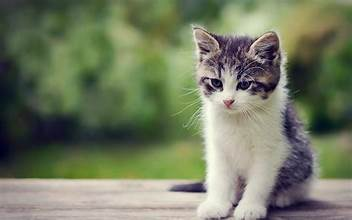

In [13]:
Image(filename = '/content/cat.jpg' , height = 300)

In [14]:
!yolo task=detect mode=predict model=yolov8n.pt source='/content/cat.jpg' # it will download the image and the modelthen it will do the prediction

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/cat.jpg: 416x640 1 cat, 142.4ms
Speed: 6.8ms preprocess, 142.4ms inference, 576.8ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


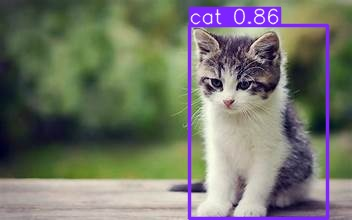

In [15]:
Image(filename = '/content/runs/detect/predict2/cat.jpg' , height = 300)

In [16]:
!pip install roboflow

In [17]:
from roboflow import Roboflow
rf = Roboflow(api_key="cdHbT9N7rvgK2WGChCph")
project = rf.workspace("detection-4nooy").project("drive-drowsiness-detection")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.38, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Drive-Drowsiness-Detection-2 in yolov8:: 100%|██████████| 492/492 [00:00<00:00, 7386.88it/s]


In [19]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get a list of image paths
image_paths = glob.glob('/content/Drive-Drowsiness-Detection-2/train/images/*.jpg')[24:36]

# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Iterate over the image paths and display images in subplots
for i, image_path in enumerate(image_paths):
    # Calculate the row and column indices of the current subplot
    row = i // 4
    col = i % 4

    # Open the image using PIL
    img = Image.open(image_path)

    # Display the image in the current subplot
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [21]:
import yaml

# Read the contents of the data.yaml file
with open('/content/Drive-Drowsiness-Detection-2/data.yaml', 'r') as file:
    data = yaml.safe_load(file)

# Update the paths in the test, train, and val sections
data['test'] = '/content/Drive-Drowsiness-Detection-2/test/images'
data['train'] = '/content/Drive-Drowsiness-Detection-2/train/images'
data['val'] = '/content/Drive-Drowsiness-Detection-2/valid/images'

# Write the modified data back to the data.yaml file
with open('/content/Drive-Drowsiness-Detection-2/data.yaml', 'w') as file:
    yaml.dump(data, file)

In [22]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

100% 49.7M/49.7M [00:00<00:00, 592MB/s]
Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Drive-Drowsiness-Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

In [23]:
from IPython.display import display , Image
from IPython import display
display.clear_output()

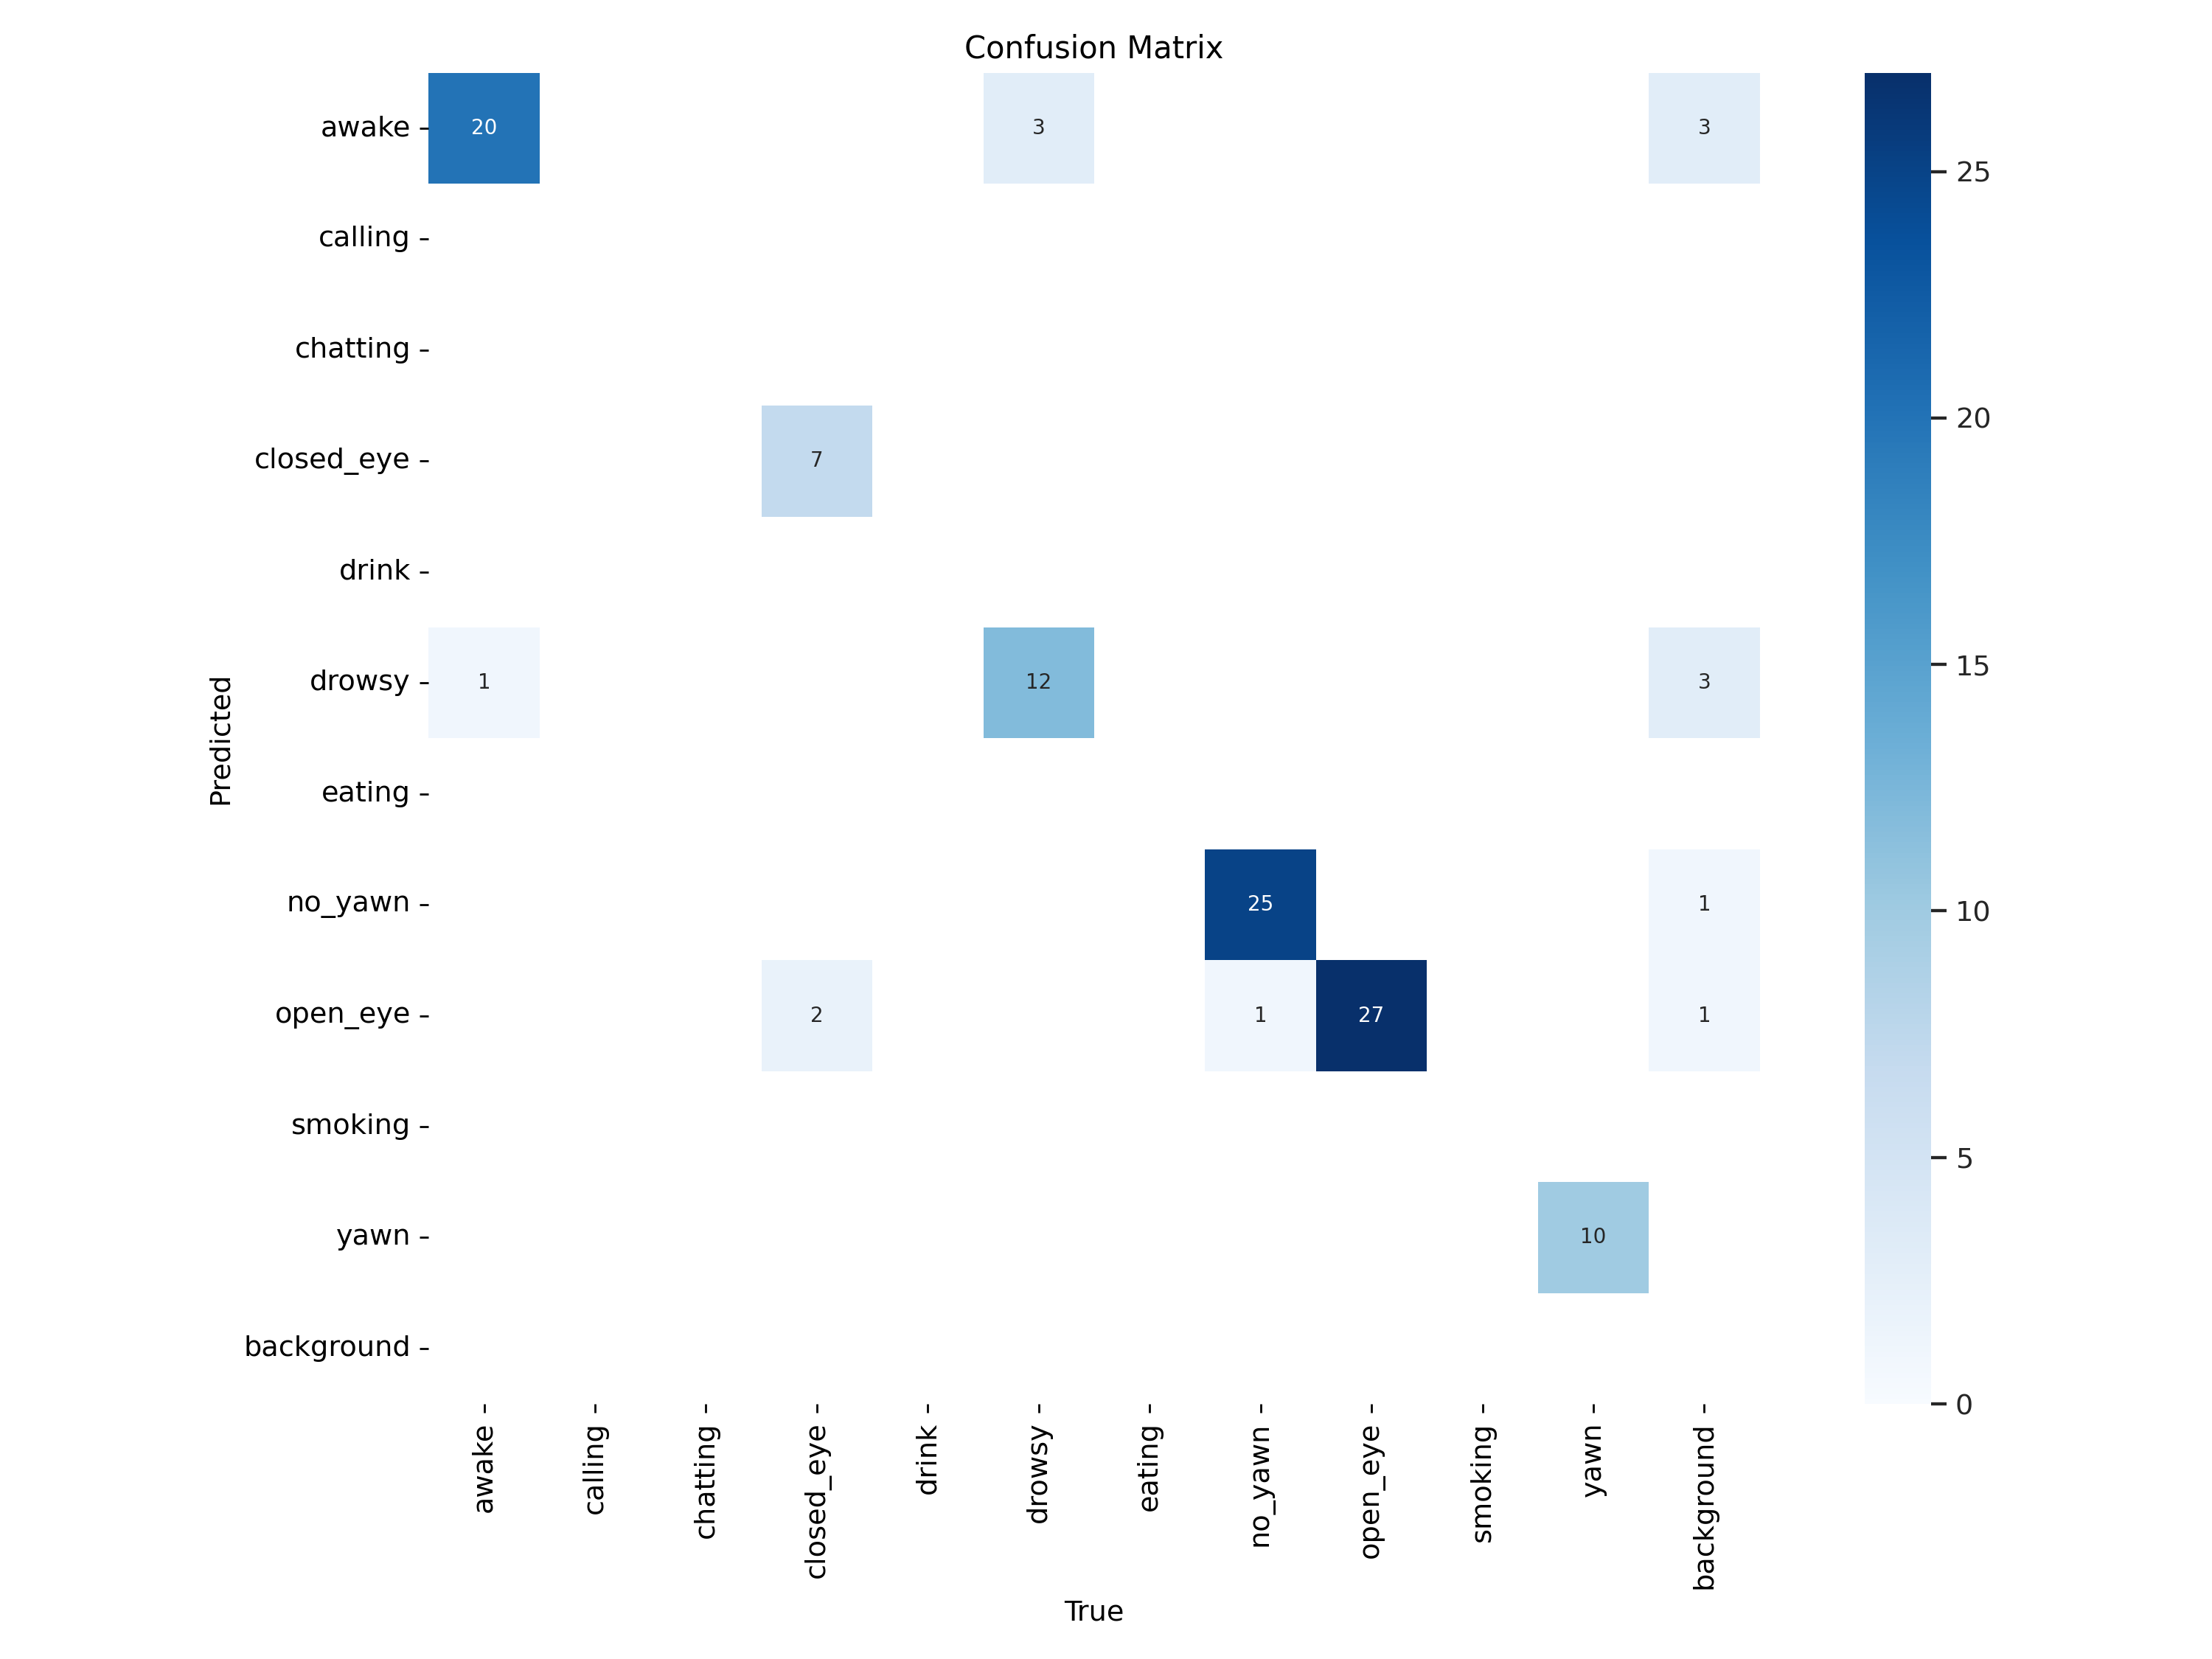

In [24]:
Image(filename = f'/content/runs/detect/train/confusion_matrix.png' , height = 600)

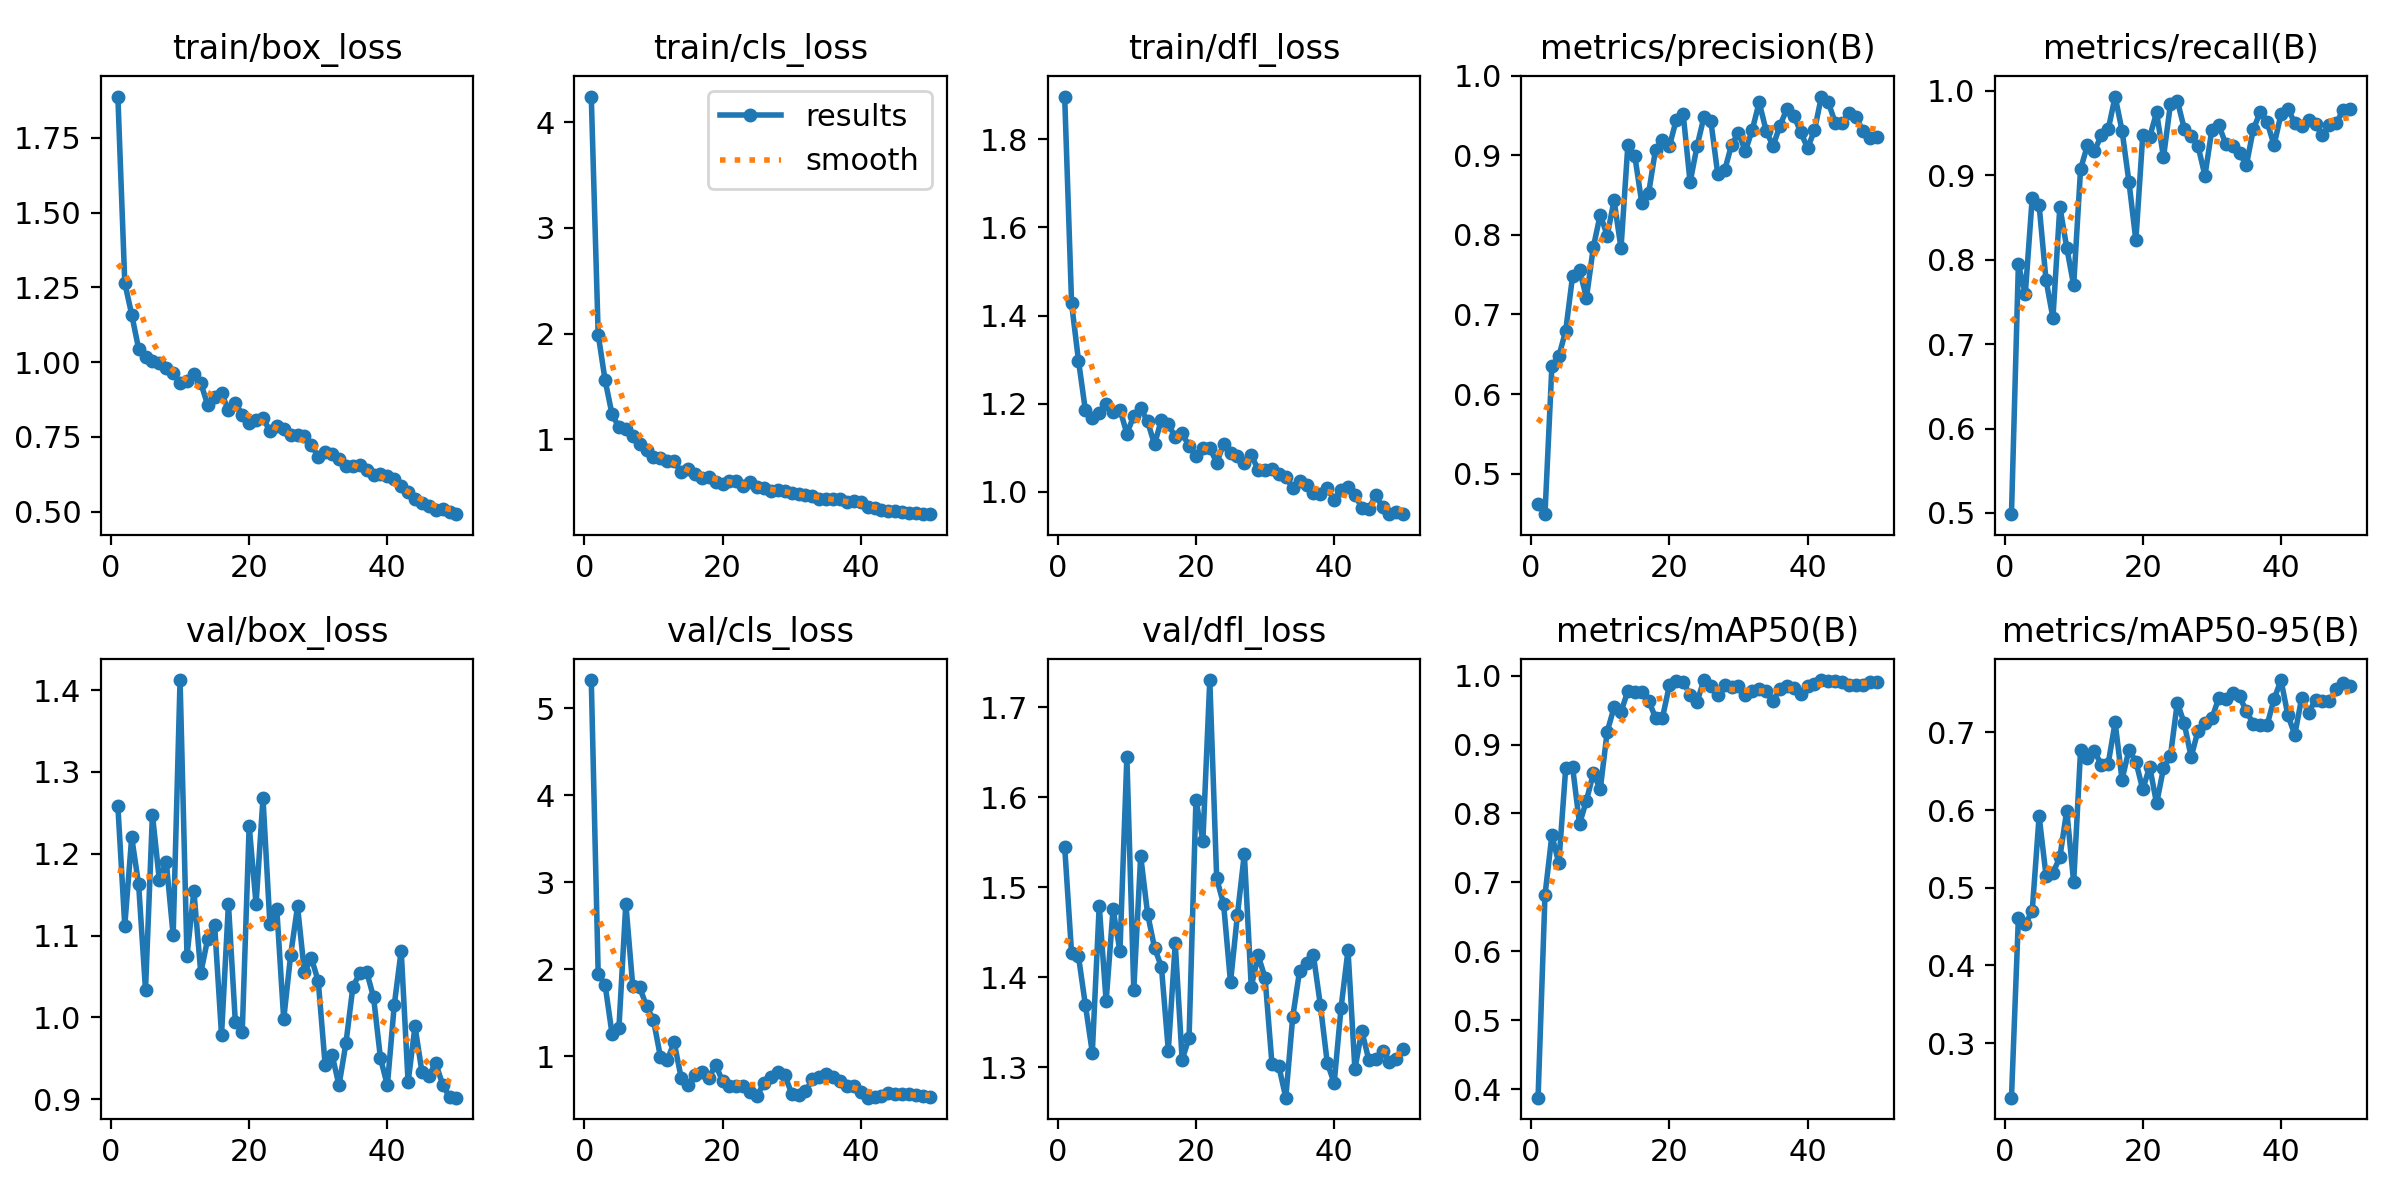

In [25]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

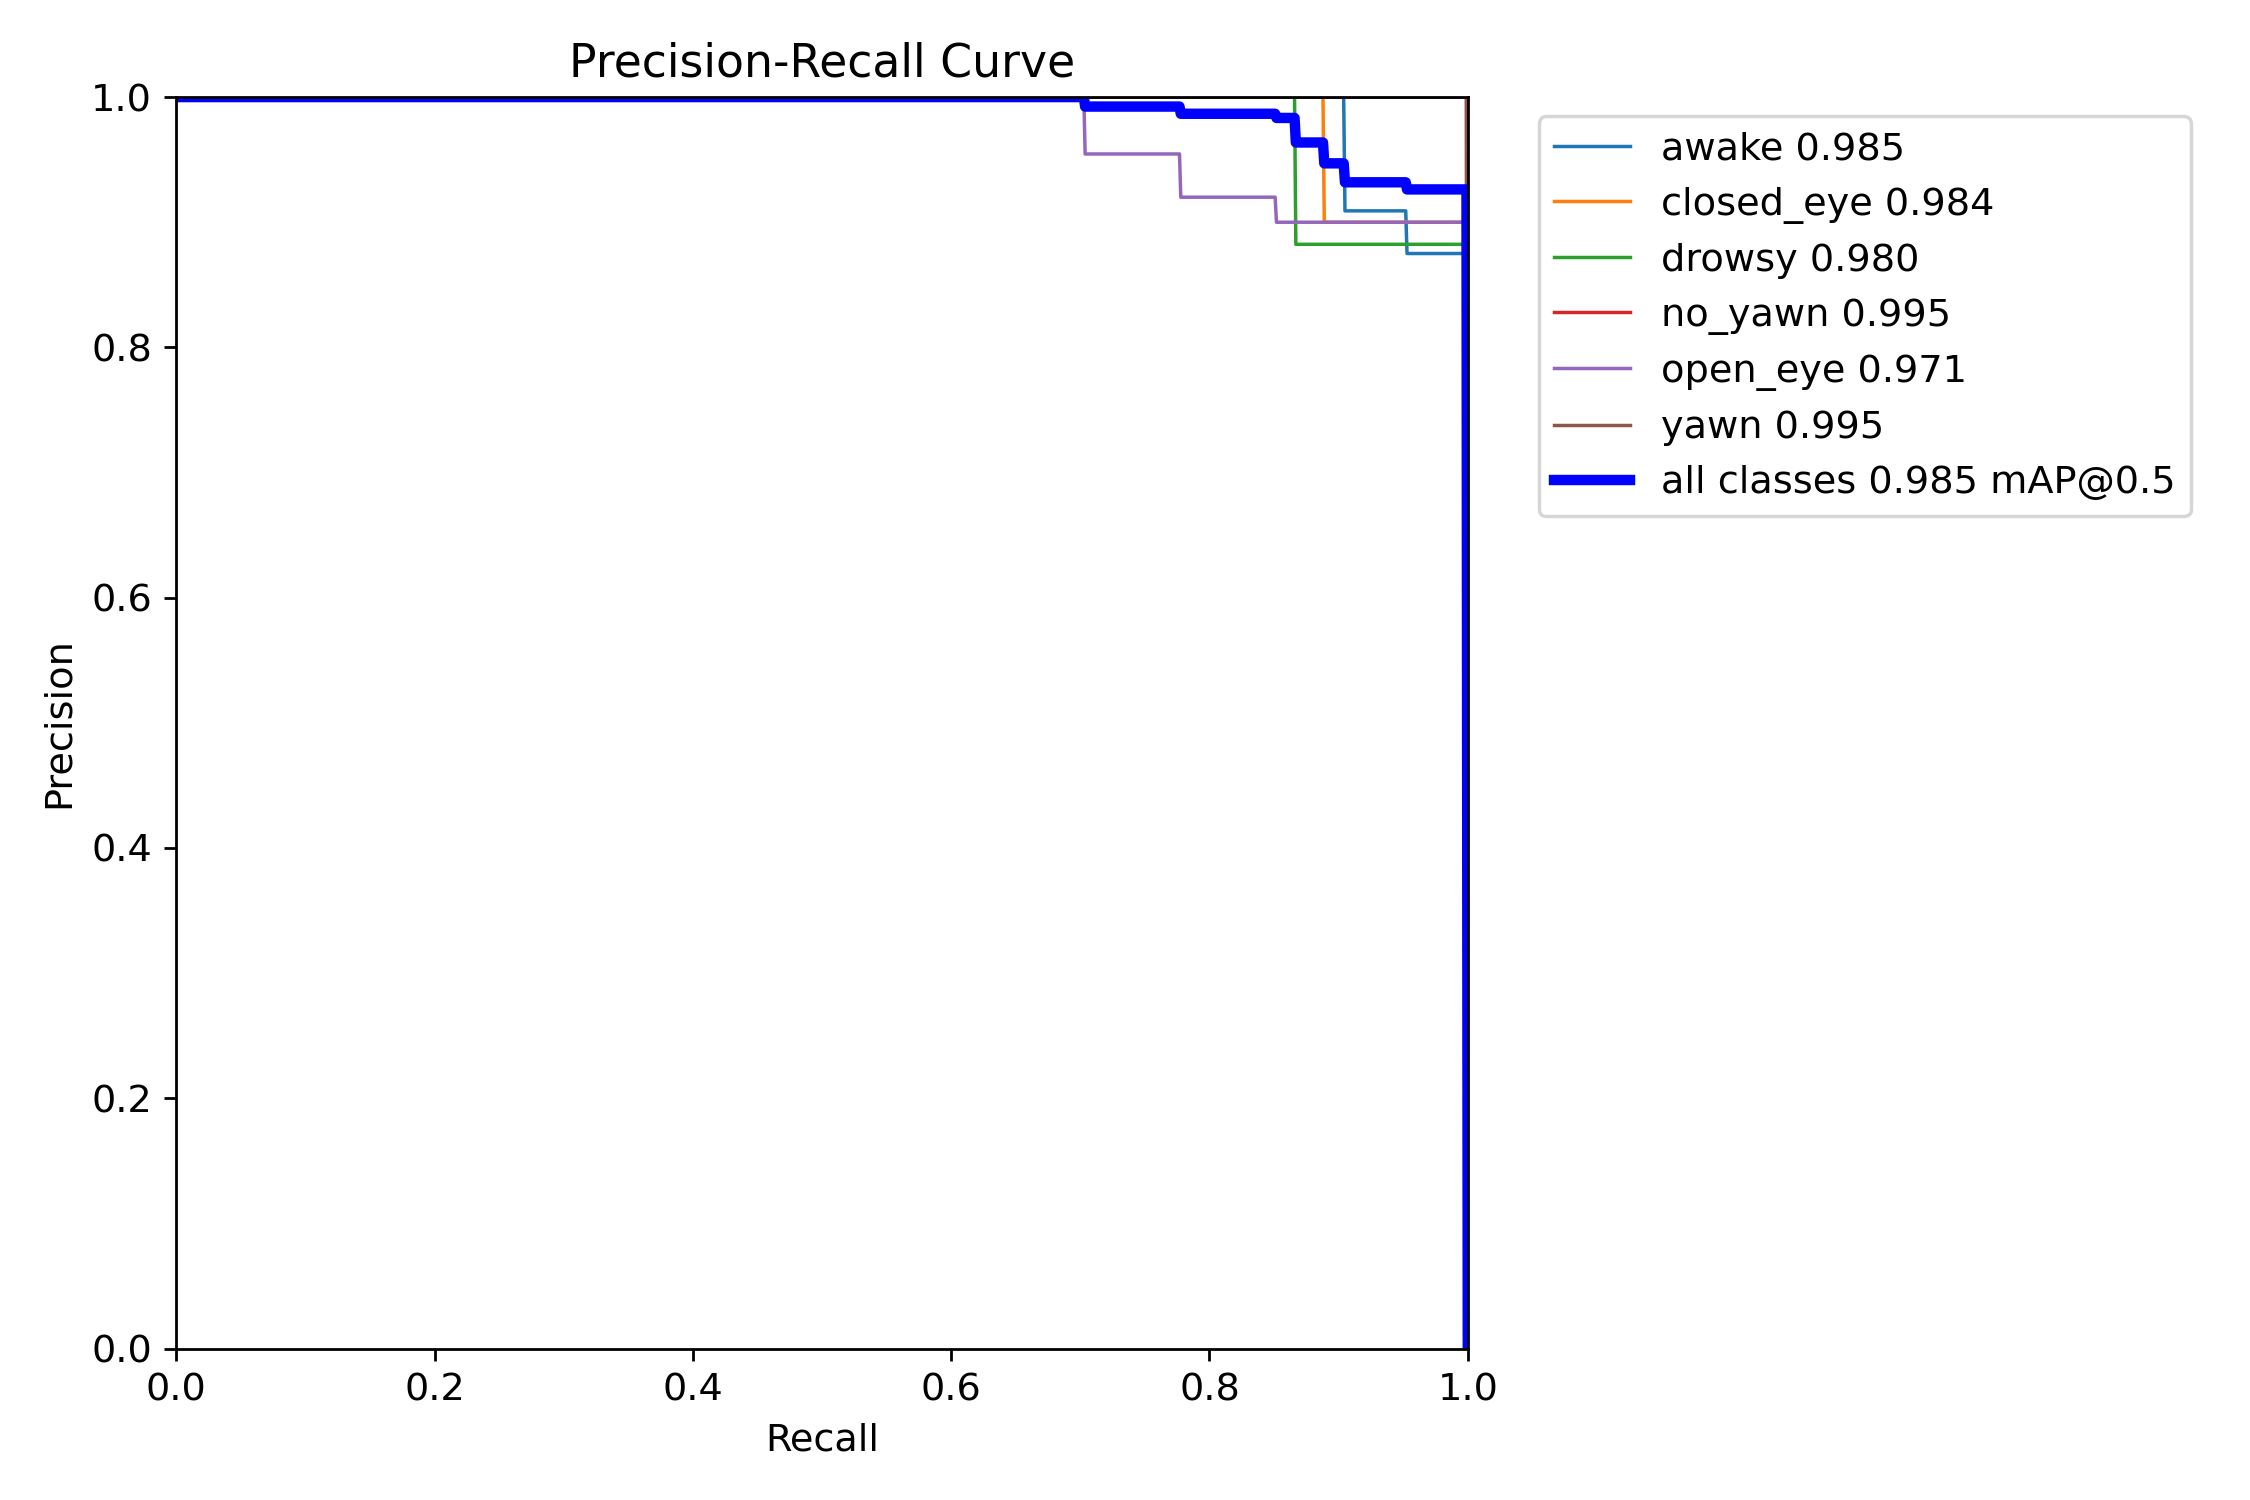

In [26]:
Image(filename=f'/content/runs/detect/train/PR_curve.png', width=600)

In [28]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml  # we just specify the weights that we want to validation off / passing all images through our model for validation

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25846129 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Drive-Drowsiness-Detection-2/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100% 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.07s/it]
                   all         36        108      0.909      0.972      0.985       

In [29]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25846129 parameters, 0 gradients, 78.7 GFLOPs

image 1/36 /content/Drive-Drowsiness-Detection-2/test/images/10_jpg.rf.e4696bc5b792a8821fb5a9eb8d6c81d6.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 10.2ms
image 2/36 /content/Drive-Drowsiness-Detection-2/test/images/132_jpg.rf.15715a998a908288272e174739b0408b.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 9.5ms
image 3/36 /content/Drive-Drowsiness-Detection-2/test/images/139_jpg.rf.3cffeb3e581e086f7f1b6658d35b86e7.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 10.0ms
image 4/36 /content/Drive-Drowsiness-Detection-2/test/images/13_jpg.rf.e83ea0fa9f9d90ac13b063c899371095.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 10.2ms
image 5/36 /content/Drive-Drowsiness-Detection-2/test/images/144_jpg.rf.3393fc5c57f38e8704703048449d143f.jpg: 640x640 1 closed_eye, 1 drowsy, 1 yawn, 9.8ms
image 6/36 /content/Drive-Drowsiness-Detectio

In [30]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get a list of image paths
image_paths = glob.glob('/content/runs/detect/predict3/*.jpg')[-12:]

# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Iterate over the image paths and display images in subplots
for i, image_path in enumerate(image_paths):
    # Calculate the row and column indices of the current subplot
    row = i // 4
    col = i % 4

    # Open the image using PIL
    img = Image.open(image_path)

    # Display the image in the current subplot
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

#show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [31]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Drive-Drowsiness-Detection-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sho

In [32]:
from IPython.display import display , Image
from IPython import display
display.clear_output()

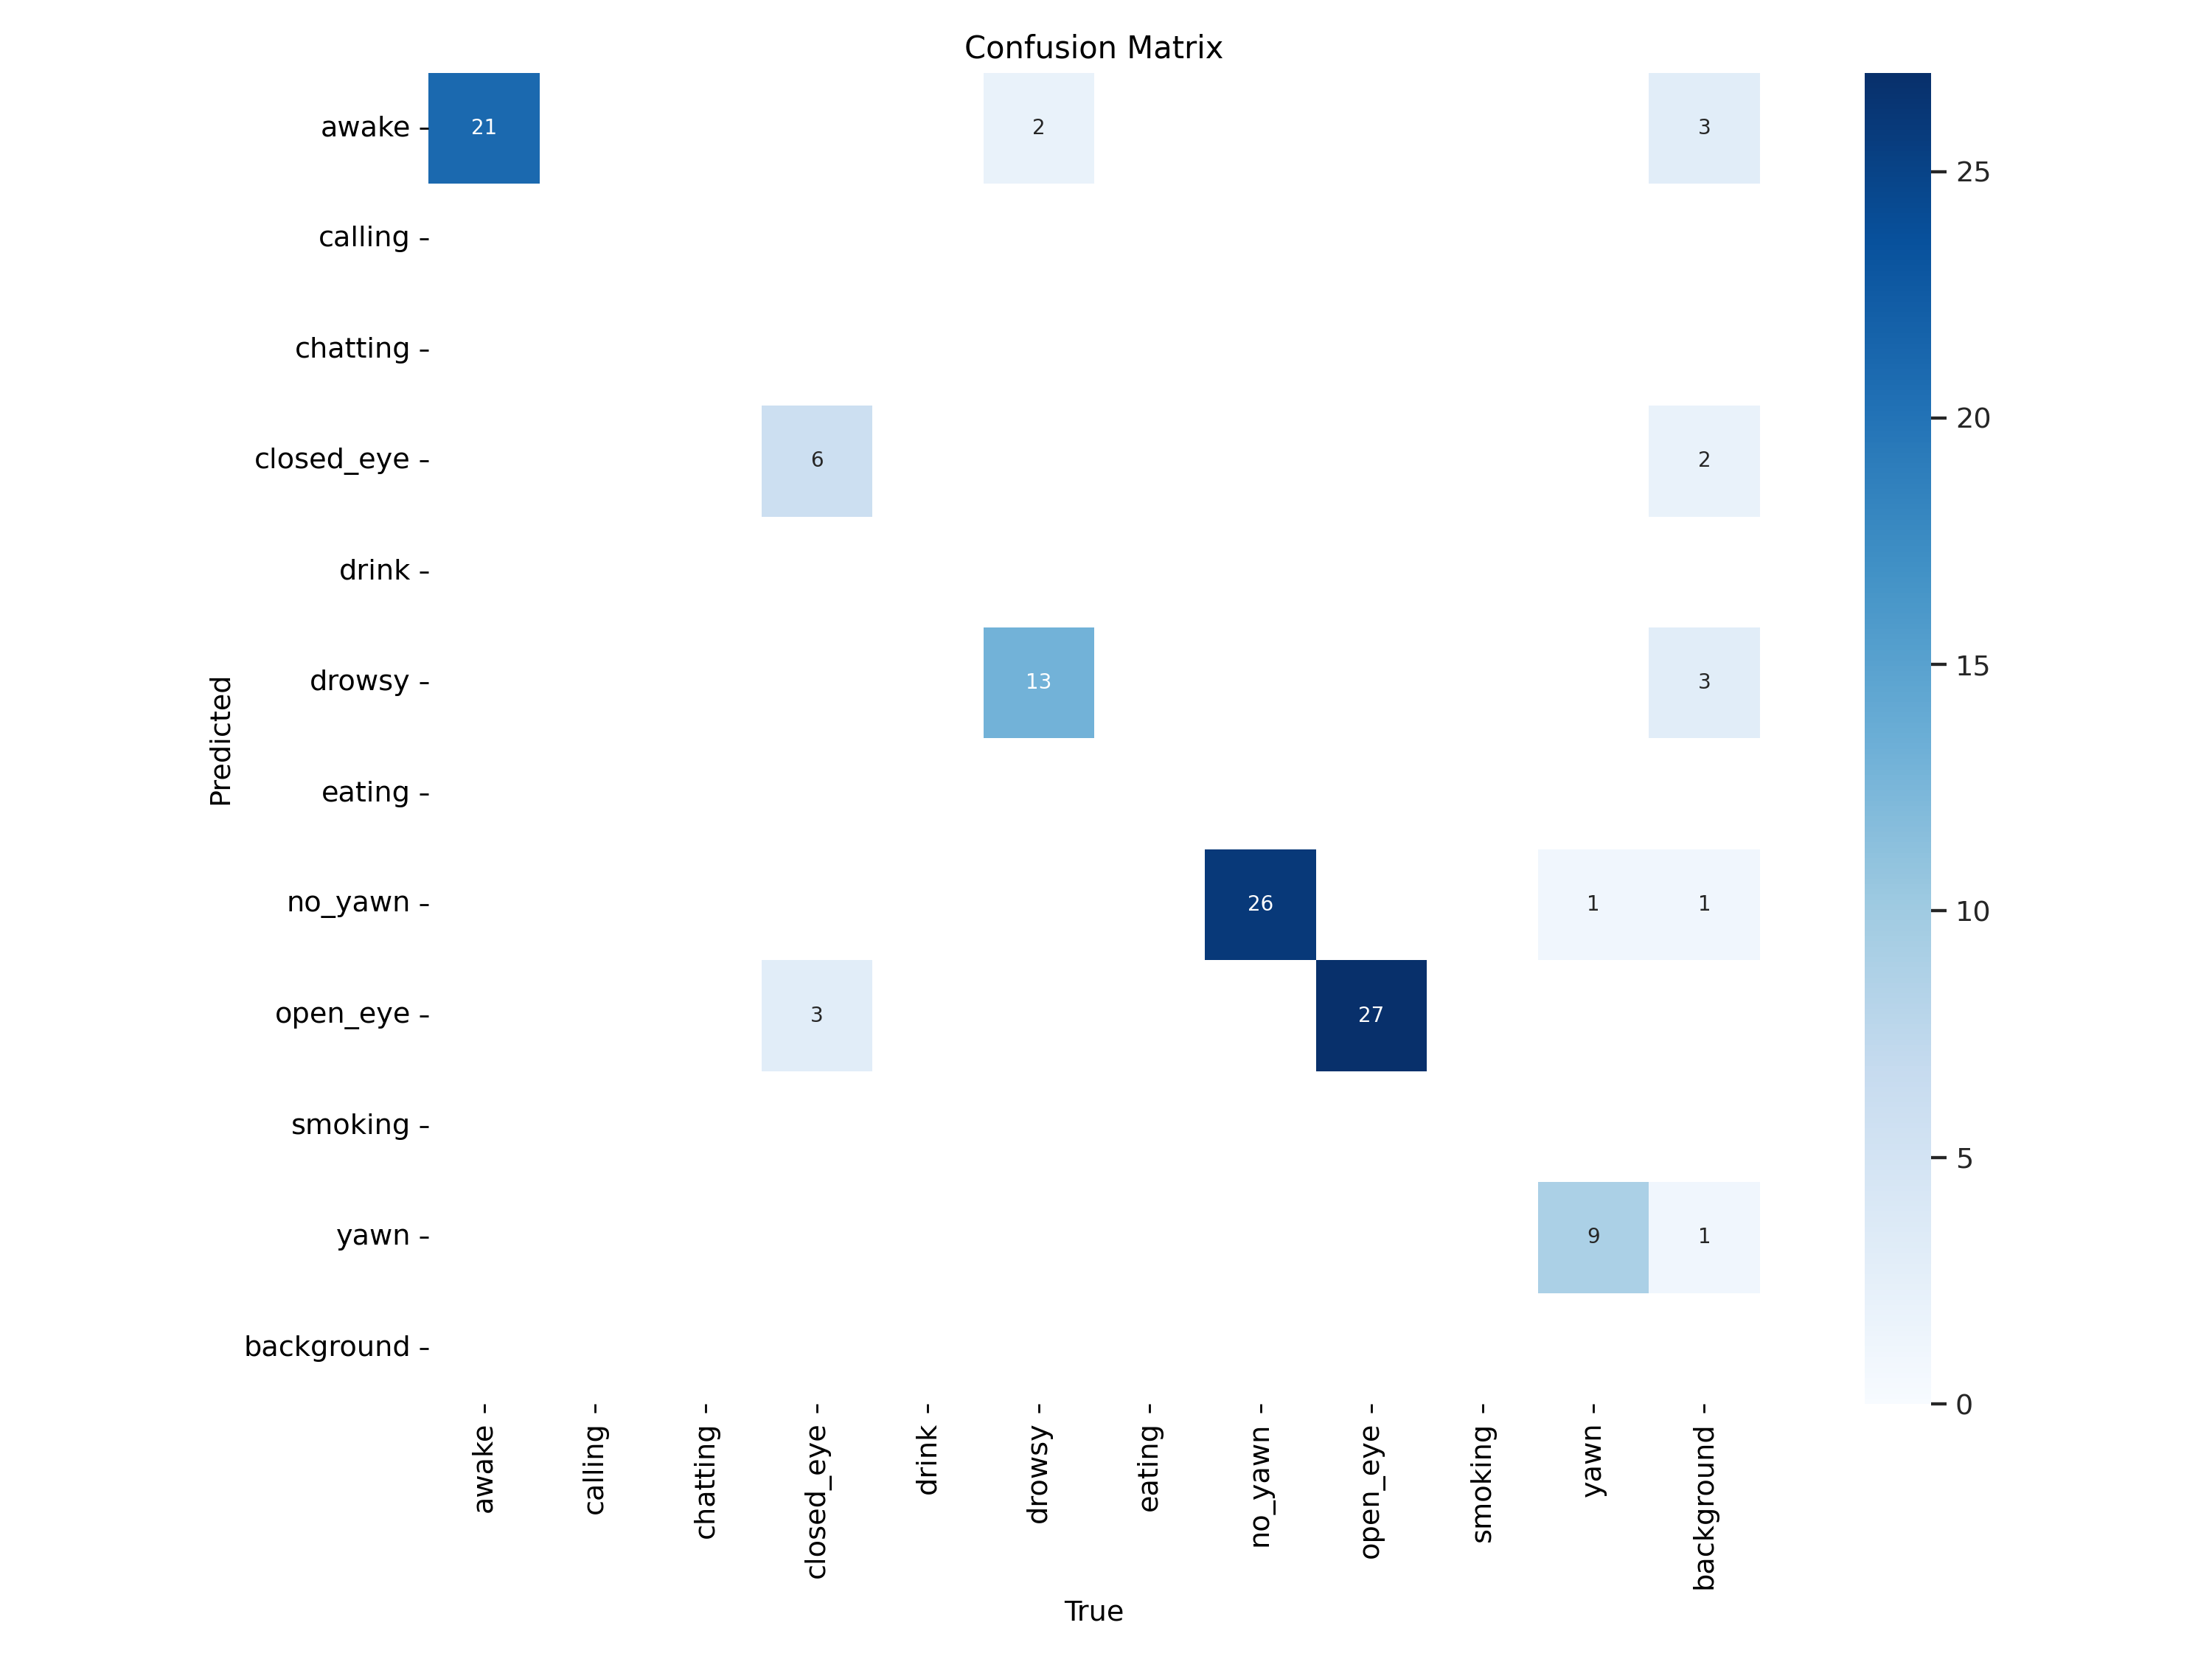

In [33]:
Image(filename = '/content/runs/detect/train2/confusion_matrix.png' , height = 600)

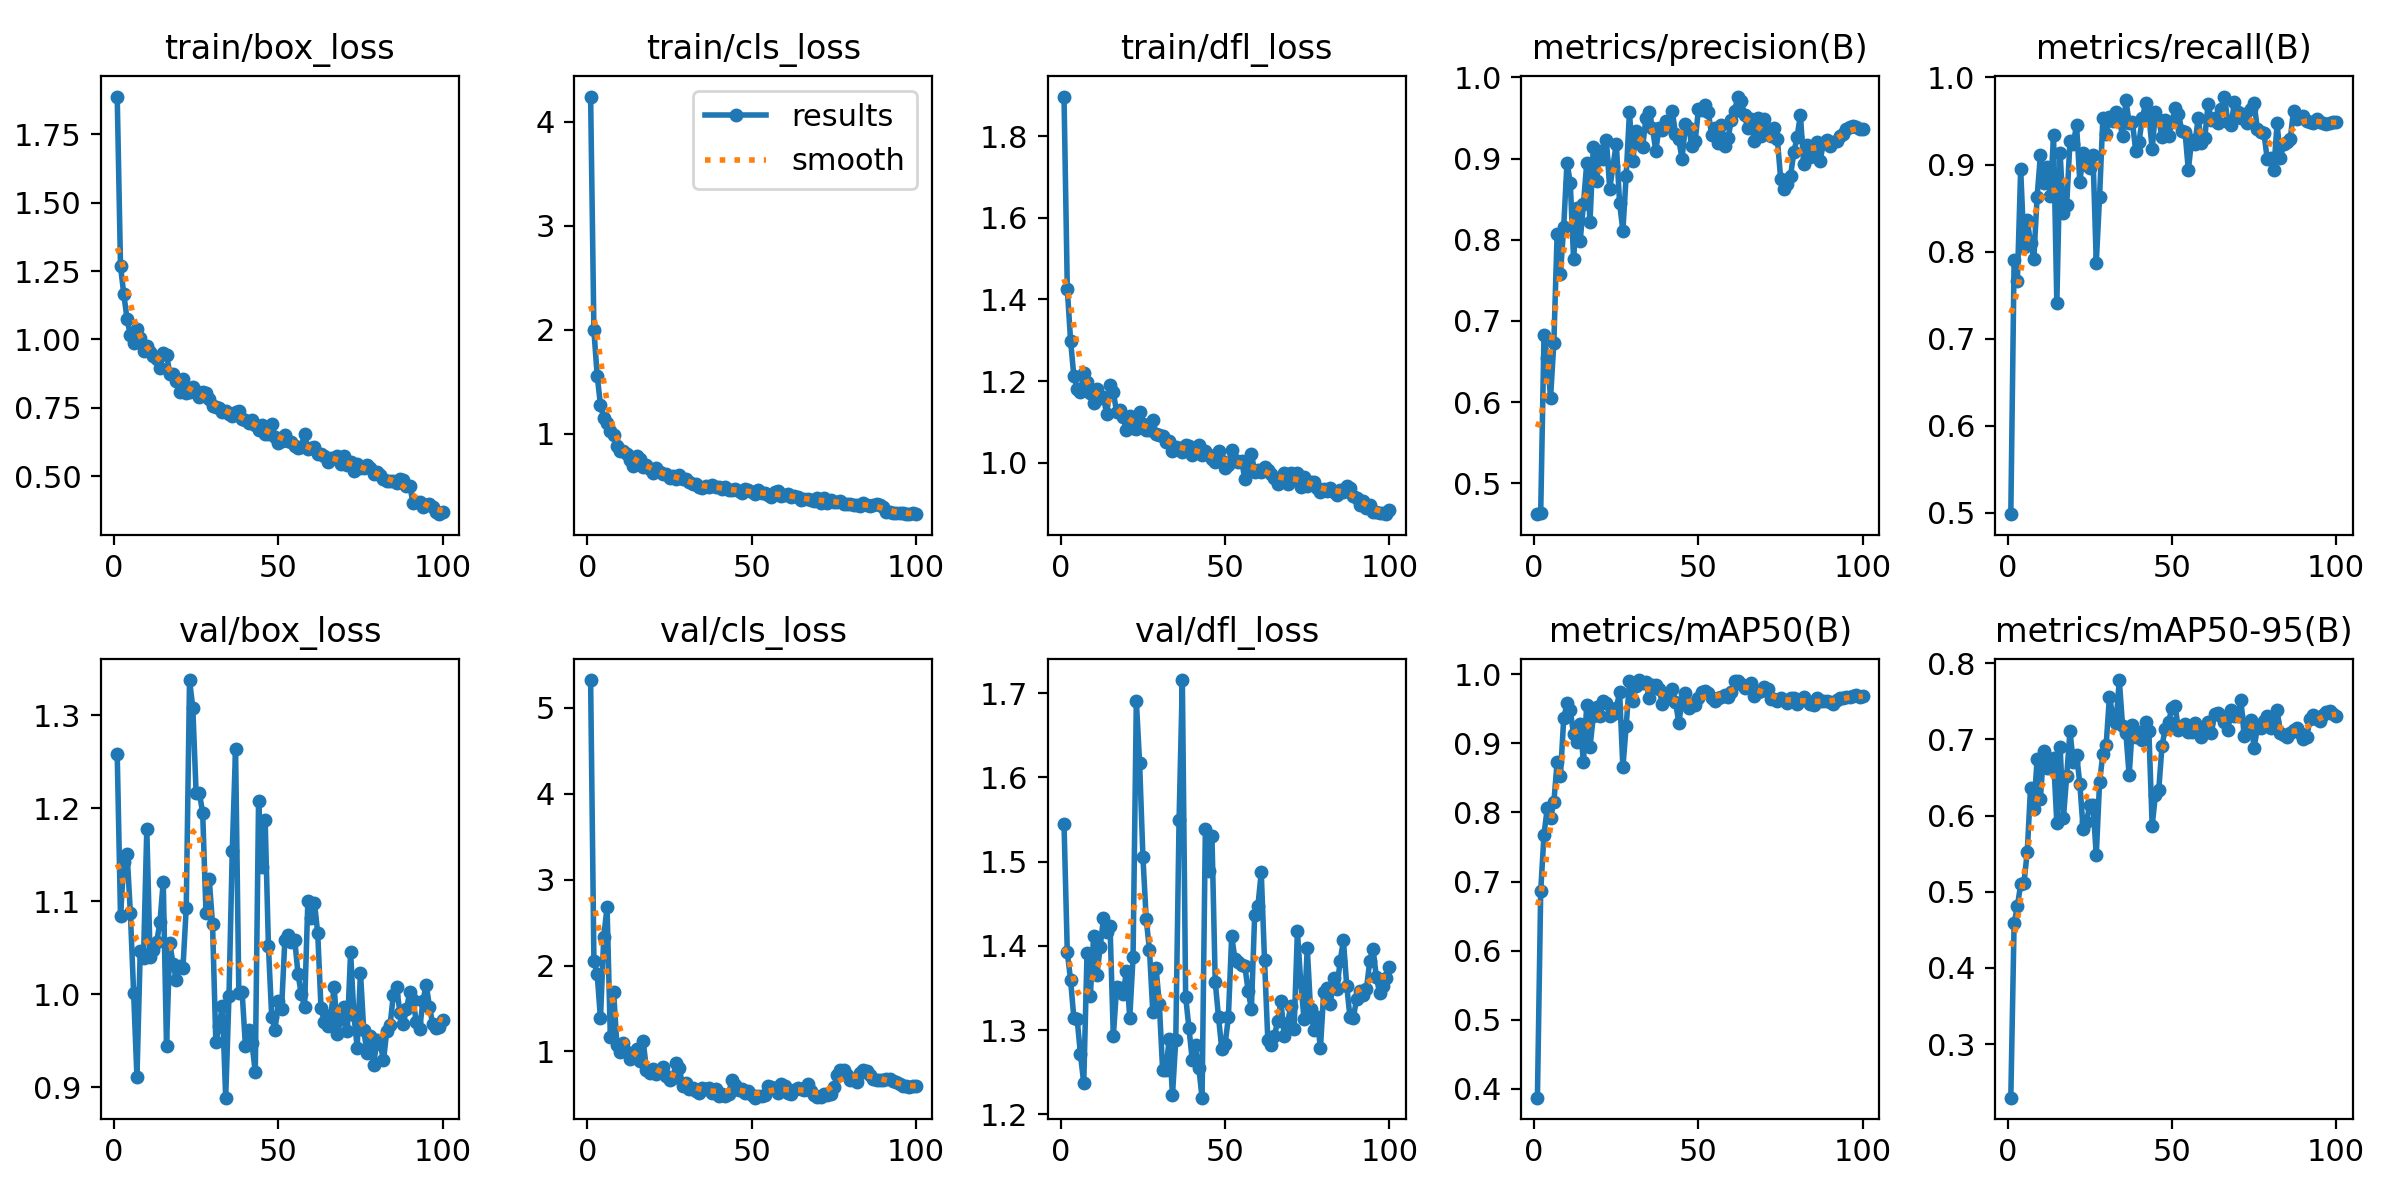

In [34]:
Image(filename=f'/content/runs/detect/train2/results.png', width=600)

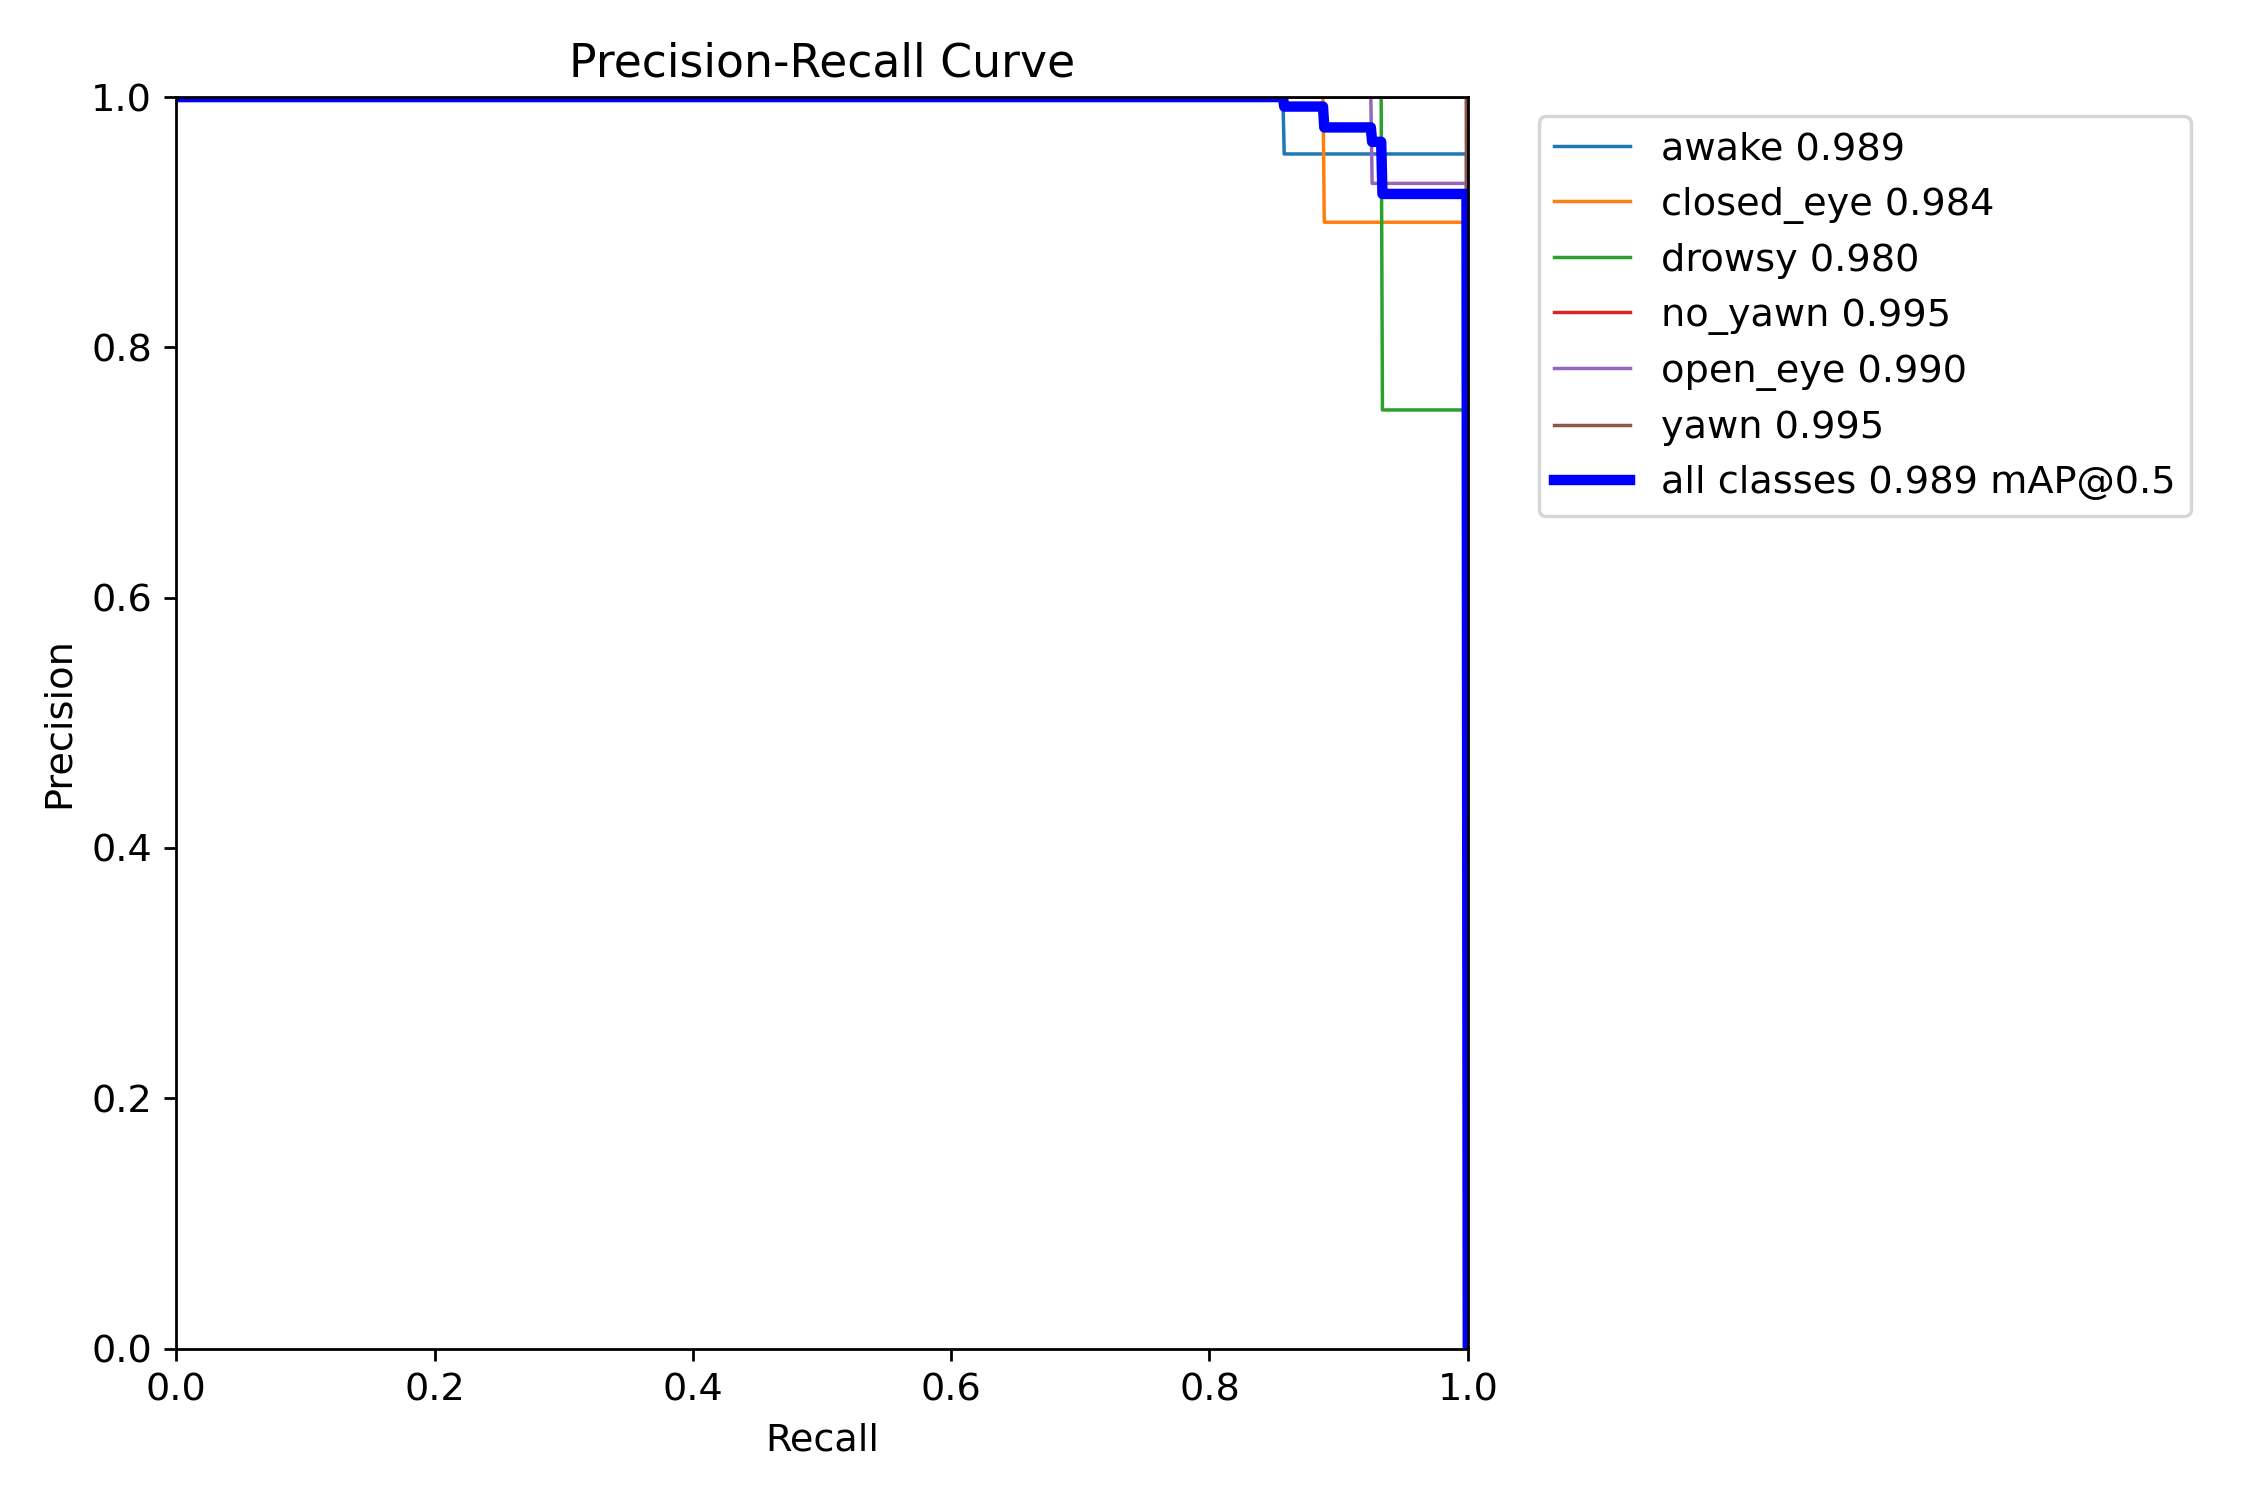

In [35]:
Image(filename=f'/content/runs/detect/train2/PR_curve.png', width=600)

In [36]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml  # we just specify the weights that we want to validation off / passing all images through our model for validation

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25846129 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Drive-Drowsiness-Detection-2/valid/labels.cache... 36 images, 0 backgrounds, 0 corrupt: 100% 36/36 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0% 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.00s/it]
                   all         36        108      0.949      0.951      0.988      0

In [37]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.2.38 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 218 layers, 25846129 parameters, 0 gradients, 78.7 GFLOPs

image 1/36 /content/Drive-Drowsiness-Detection-2/test/images/10_jpg.rf.e4696bc5b792a8821fb5a9eb8d6c81d6.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 9.4ms
image 2/36 /content/Drive-Drowsiness-Detection-2/test/images/132_jpg.rf.15715a998a908288272e174739b0408b.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 9.6ms
image 3/36 /content/Drive-Drowsiness-Detection-2/test/images/139_jpg.rf.3cffeb3e581e086f7f1b6658d35b86e7.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 9.1ms
image 4/36 /content/Drive-Drowsiness-Detection-2/test/images/13_jpg.rf.e83ea0fa9f9d90ac13b063c899371095.jpg: 640x640 1 drowsy, 1 open_eye, 1 yawn, 9.4ms
image 5/36 /content/Drive-Drowsiness-Detection-2/test/images/144_jpg.rf.3393fc5c57f38e8704703048449d143f.jpg: 640x640 1 closed_eye, 1 drowsy, 9.4ms
image 6/36 /content/Drive-Drowsiness-Detection-2/test/im

In [38]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Get a list of image paths
image_paths = glob.glob('/content/runs/detect/predict3/*.jpg')[-12:]

# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Iterate over the image paths and display images in subplots
for i, image_path in enumerate(image_paths):
    # Calculate the row and column indices of the current subplot
    row = i // 4
    col = i % 4

    # Open the image using PIL
    img = Image.open(image_path)

    # Display the image in the current subplot
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.